# Conférences Python Master TIDE #1

## Librairie pandas

Dataset des communes françaises : `correspondance-code-insee-code-postal.csv`

0) Import
- Importer les librairies pandas et matplotlib.pyplot
- Utiliser les options suivantes
```python
pd.set_option("display.min_rows", 16)
plt.style.use('seaborn-darkgrid')
```

1) Charger le fichier CSV
- Uniquement les 11 première colonnes
- Utiliser la colonne "Code INSEE" comme index
- Trier selon l'index

2) Questions
- Combien y a-t-il de départements ?
- Quelle commune est la plus haute ?
- Quelle commune est la plus peuplée ?
- Quelle commune a le nom le plus court ?
- Quelle commune a le nom le plus long ?
- Quel est le nom de commune le plus fréquent ?
- Ecrire une fonction qui recherche les communes se terminant par un motif du type "-mot1-mot2" (par exemple "-SUR-MER")
```python
def selection(mot1, mot2):
    pass
```
- Quelles villes contiennent deux "Z" (accolés, séparés par une seule lettre, séparés par un nombre quelconque de lettres, séparés par au moins une lettre) ?
- Quelles sont les dix terminaisons des noms de communes du type "-mot1-mot2" les plus fréquentes ?

3) Transformations
- Passer la colonne "Superficie" en km²
- Passer la colonne "Altitude Moyenne" en entiers
- Créer une colonne "Densité" pour la population
- Modifier la colonne "Statut" en categorie ordonnée

4) Géographie
- Créer une colonne "CP Ville" à partir du code postal et du nom de chaque commune
- Extraire la latitude et la longitude de la colonne "geo_point_2d"
- Ecrire une fonction qui retourne le "CP Ville" de la commune la plus proche d'une latitude et d'une longitude
```python
def ville(lat, long):
    pass
```
- Ecrire une fonction qui transforme des coordonnées GPS (en degrés, minutes et secondes) en coordonnées décimales
```python
def gps2dec(deg, mn, sec):
    pass
```
- Choisir une petite commune française sur Wikipedia et vérifier qu'elle est trouvée à partir de ces coordonnnées GPS en utilisant les 2 fonctions définies

5) Géométrie
- Décoder les données JSON de la colonne "geo_shape"
- Donner le décompte des différentes valeurs associées à la clé "type"
- Donner le décompte des longueurs des listes associées à la clé "coordinates"
- Quelles sont les "CP Ville" des communes de type "Polygone" et dont la longueur des listes accédées avec la clé "coordinates" vaut 2 ?

6) Graphiques
- Afficher un histogramme avec les longueurs des noms des communes
- Afficher un graphique de type scatterplot à partir des coordonnées des communes
- Trouver une condition pour limiter le dataset à la France métropolitaine et afficher un graphique
- Mettre toutes les communes à moins de 1000m en bleu et celle à plus de 1000m en rouge
- Afficher un graphique de type scatterplot dans lequel les communes se terminant par un motif du type "-mot1-mot2" sont mis dans une autre couleur
- Afficher un graphique de type scatterplot dans lequel la couleur utilisée dépend de la colonne "Altitude moyenne" selon la colormap "Spectral_r"
- Afficher une carte de France métropolitaine avec les préfectures de région et leur nom, en corrigeant celles qui sont des arrondissements de Paris, Lyon ou Marseille.

&copy; Francis Wolinski 2023

In [1]:
# 0

import pandas as pd
import matplotlib.pyplot as plt

pd.set_option("display.min_rows", 16)
plt.style.use('seaborn-darkgrid')

In [2]:
# 1

df = (pd
      .read_csv("data/correspondance-code-insee-code-postal.csv",
                sep=";",
                index_col="Code INSEE",
                usecols=range(11))
      .sort_index()
     )

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36742 entries, 01001 to 97617
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Code Postal       36742 non-null  object 
 1   Commune           36742 non-null  object 
 2   Département       36742 non-null  object 
 3   Région            36742 non-null  object 
 4   Statut            36742 non-null  object 
 5   Altitude Moyenne  36742 non-null  float64
 6   Superficie        36742 non-null  float64
 7   Population        36742 non-null  float64
 8   geo_point_2d      36742 non-null  object 
 9   geo_shape         36742 non-null  object 
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


In [3]:
# 2-1
print("Combien y a-t-il de départements ?", df["Département"].nunique())
print("Quelle commune est la plus haute ?", df.loc[df["Altitude Moyenne"].idxmax(), "Commune"])
print("Quelle commune est la plus peuplée ?", df.loc[df["Population"].idxmax(), "Commune"])
print("Quelle commune a le nom le plus court ?", df.loc[df["Commune"].str.len().idxmax(), "Commune"])
print("Quelle commune a le nom le plus long ?", df.loc[df["Commune"].str.len().idxmin(), "Commune"])
print("Quel est le nom de commune le plus fréquent ?", df["Commune"].describe()['top'])

Combien y a-t-il de départements ? 101
Quelle commune est la plus haute ? BONNEVAL-SUR-ARC
Quelle commune est la plus peuplée ? TOULOUSE
Quelle commune a le nom le plus court ? SAINT-REMY-EN-BOUZEMONT-SAINT-GENEST-ET-ISSON
Quelle commune a le nom le plus long ? Y
Quel est le nom de commune le plus fréquent ? SAINTE-COLOMBE


In [4]:
# 2-2

def select(df, mot1, mot2):
    motif = f"-{mot1}-{mot2}"  # f-string
    return df.loc[df["Commune"].str.endswith(motif), "Commune"]

select(df, "SUR", "MER")

Code INSEE
06011         BEAULIEU-SUR-MER
06027           CAGNES-SUR-MER
06138          THEOULE-SUR-MER
06159     VILLEFRANCHE-SUR-MER
13039              FOS-SUR-MER
14059       BENERVILLE-SUR-MER
14062             BENY-SUR-MER
14066        BERNIERES-SUR-MER
                 ...          
85035     BRETIGNOLLES-SUR-MER
85114             JARD-SUR-MER
85127       LONGEVILLE-SUR-MER
85166           OLONNE-SUR-MER
85201    SAINT-BENOIST-SUR-MER
85243             BREM-SUR-MER
85294       LA TRANCHE-SUR-MER
85307         LA FAUTE-SUR-MER
Name: Commune, Length: 100, dtype: object

In [5]:
# 2-3
var = df.loc[df["Commune"].str.contains("ZZ"), "Commune"].values
var.sort()
print(var)
var = df.loc[df["Commune"].str.contains("Z.Z"), "Commune"].values
var.sort()
print(var)
var = df.loc[df["Commune"].str.contains("Z.*Z"), "Commune"].values
var.sort()
print(var)
var = df.loc[df["Commune"].str.contains("Z.+Z"), "Commune"].values
var.sort()
print(var)

['AZZANA' 'BERGHOLTZZELL' 'COZZANO' 'FOZZANO' 'LINGUIZZETTA' 'LOZZI'
 'LUGO-DI-NAZZA' 'MAZZOLA' "MONACIA-D'OREZZA" 'PIAZZALI' 'PIAZZOLE'
 "PIE-D'OREZZA" 'POGGIO-DI-NAZZA' 'POGGIO-MEZZANA' 'REZZA' 'STAZZONA'
 "VALLE-D'OREZZA" 'VALLE-DI-MEZZANA' 'VEZZANI']
['DEZIZE-LES-MARANGES' 'VEZEZOUX' 'ZOZA']
['ALLEZ-ET-CAZENEUVE' 'ARCIZAC-EZ-ANGLES' 'ARZACQ-ARRAZIGUET'
 'AZANNES-ET-SOUMAZANNES' 'AZILONE-AMPAZA' 'AZZANA' 'BAZOCHES-SUR-LE-BETZ'
 'BELVEZE-DU-RAZES' 'BERGHOLTZZELL' 'BEUZEC-CAP-SIZUN'
 'CAZOULS-LES-BEZIERS' "CHAZAY-D'AZERGUES" 'CIREY-SUR-VEZOUZE' 'COZZANO'
 'DAUMAZAN-SUR-ARIZE' 'DEZIZE-LES-MARANGES' 'DOMEVRE-SUR-VEZOUZE'
 'DZAOUDZI' 'ERIZE-SAINT-DIZIER' 'FLEZ-CUZY' 'FOZZANO' 'GEZ-EZ-ANGLES'
 'GOUZANGREZ' 'INZINZAC-LOCHRIST' "JUZET-D'IZAUT" 'LEZAT-SUR-LEZE'
 'LIMETZ-VILLEZ' 'LINGUIZZETTA' 'LOZZI' 'LUGO-DI-NAZZA'
 'MAIZIERES-LES-METZ' 'MAZERAT-AUROUZE' 'MAZERES-LEZONS'
 'MAZEROLLES-DU-RAZES' 'MAZZOLA' 'MEZIERES-LEZ-CLERY' "MONACIA-D'OREZZA"
 'MONTPEZAT-SOUS-BAUZON' 'OBERMODERN-ZUTZENDORF'

In [6]:
# 2-4
df["Commune"].str.extract(r"(-\w+-\w+)$").value_counts().head(10)

-SUR-MER       100
-SUR-SEINE      71
-SUR-LOIRE      70
-LES-BAINS      60
-LE-CHATEAU     56
-SUR-MARNE      56
-LE-GRAND       47
-AUX-BOIS       46
-LE-SEC         45
-LA-VILLE       43
dtype: int64

In [7]:
# 3
df["Superficie"] /= 100.0
df["Altitude Moyenne"] = df["Altitude Moyenne"].astype(int)
df["Densité"] = df["Population"] / df["Superficie"]
statut_dtype = pd.CategoricalDtype(categories=["Commune simple", "Chef-lieu canton", "Sous-préfecture",
                                               "Préfecture", "Préfecture de région", "Capitale d'état"], 
                                   ordered=True)
df["Statut"] = df["Statut"].astype(statut_dtype)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36742 entries, 01001 to 97617
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Code Postal       36742 non-null  object  
 1   Commune           36742 non-null  object  
 2   Département       36742 non-null  object  
 3   Région            36742 non-null  object  
 4   Statut            36742 non-null  category
 5   Altitude Moyenne  36742 non-null  int32   
 6   Superficie        36742 non-null  float64 
 7   Population        36742 non-null  float64 
 8   geo_point_2d      36742 non-null  object  
 9   geo_shape         36742 non-null  object  
 10  Densité           36742 non-null  float64 
dtypes: category(1), float64(3), int32(1), object(6)
memory usage: 4.0+ MB


In [8]:
# 4
df["cp_ville"] = df["Code Postal"] + " " + df["Commune"]
df[["Latitude", "Longitude"]] = df["geo_point_2d"].str.extract('(.*), (.*)').astype(float)

def ville2(lat, long):
    dist2 = (df["Latitude"] - lat)**2 + (df["Longitude"] - long)**2
    return df.loc[dist2.idxmin(), "cp_ville"]

def gps2dec(deg, mn, sec):
    return deg + mn / 60 + sec / 3600

# 45° 10′ 31″ nord, 5° 04′ 16″ est
ville2(gps2dec(45, 10, 31), gps2dec(5, 4, 16))

'26350 CREPOL'

In [9]:
# 5
import json

geo_shape_json = df['geo_shape'].apply(json.loads)

print(geo_shape_json.apply(lambda x: x["type"]).value_counts(), end='\n\n')

print(geo_shape_json.apply(lambda x: len(x["coordinates"])).value_counts(), end='\n\n')

print(df.loc[(geo_shape_json.apply(lambda x: x['type'])=='Polygon') &
             (geo_shape_json.apply(lambda x: len(x['coordinates']))==2), 'cp_ville'], end='\n\n')

Polygon         36670
MultiPolygon       72
Name: geo_shape, dtype: int64

1    36660
2       80
3        1
4        1
Name: geo_shape, dtype: int64

Code INSEE
02232               02600 COYOLLES
05052               05600 EYGLIERS
09042    09240 LA BASTIDE-DE-SEROU
22209              22650 PLOUBALAY
2A272                20100 SARTENE
2B049              20214 CALENZANA
48080               48300 LANGOGNE
67486              67920 SUNDHOUSE
68078              68420 EGUISHEIM
71028            71270 BEAUVERNOIS
Name: cp_ville, dtype: object



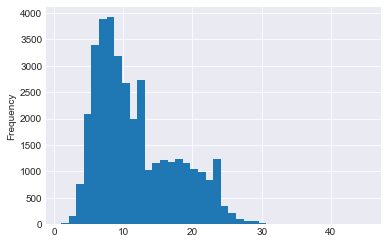

In [10]:
# 6-1

(df["Commune"]
 .str
 .len()
 .plot
 .hist(bins=40)
);

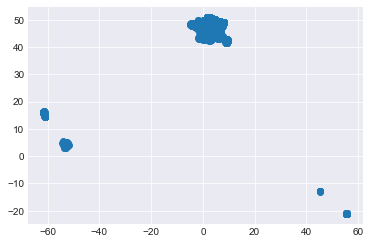

In [11]:
# 6-2

plt.scatter(x=df["Longitude"], y=df["Latitude"]);

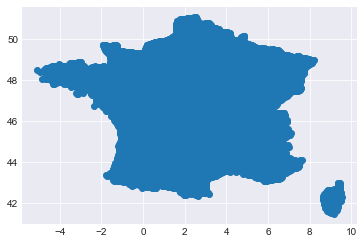

In [12]:
# 6-3

metro = df.loc[df["Latitude"] > 40]

plt.scatter(x=metro["Longitude"], y=metro["Latitude"]);

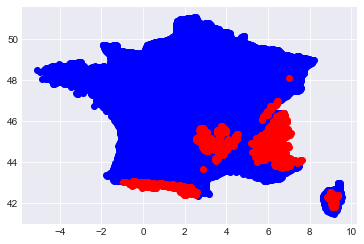

In [13]:
# 6-4

metro1 = metro.loc[metro["Altitude Moyenne"] <= 1000]
plt.scatter(metro1["Longitude"], metro1["Latitude"], color='blue')

metro2 = metro.loc[metro["Altitude Moyenne"] > 1000]
plt.scatter(metro2["Longitude"], metro2["Latitude"], color='red');

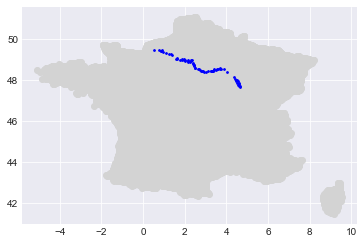

In [14]:
# 6-5

def select(df, mot1, mot2):
    motif = f"-{mot1}-{mot2}"  # f-string
    return df.loc[df["Commune"].str.endswith(motif)]

def show(df, mot1, mot2):
    # carte avec tout df en gris
    plt.scatter(df["Longitude"], df["Latitude"], color='lightgray')
    # sélection des villes se terminant par -mot1-mot2
    selection = select(df, mot1, mot2)
    # carte avec la sélection en bleu
    plt.scatter(selection["Longitude"], selection["Latitude"], color='blue',s=3);
    
show(metro, "SUR", "SEINE")

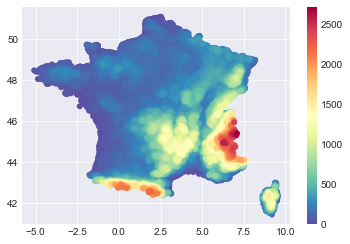

In [15]:
# 6-6
metro = metro.sort_values("Altitude Moyenne")
var = plt.scatter(x=metro["Longitude"],
            y=metro["Latitude"],
            c=metro["Altitude Moyenne"],
            cmap=plt.cm.Spectral_r,
            edgecolors='none')

plt.colorbar(var);

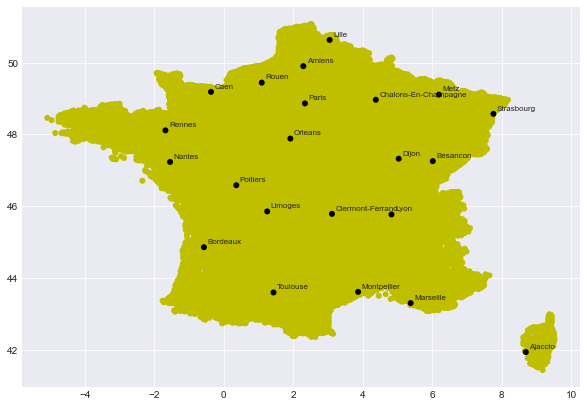

In [16]:
# 6-7
plt.figure(figsize=(10, 7))
metro_A = metro.loc[metro["Statut"] < "Préfecture de région"]
# communes
plt.scatter(metro_A["Longitude"],
            metro_A["Latitude"],
            c='y',
            edgecolors='none')
# noms des préfectures de région hors PLM
metro_B = metro.loc[(metro["Statut"] >= "Préfecture de région")]
plt.scatter(metro_B["Longitude"],
            metro_B["Latitude"],
            c='k',
            edgecolors='none')
for i, row in metro_B.iterrows():
    ville = row["Commune"].split("--")[0].title()
    ville = "Paris" if ville.startswith("Paris") else ville
    
    plt.text(row["Longitude"]+.1,
             row["Latitude"]+.1,
             ville,
             fontsize=8)